In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from tensorflow.python.keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

In [2]:
x = np.arange(10).reshape(-1,1) # reshape(-1,1) сделать из строки столбец
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4)  # разбивка данных на тренировочную и тестовую test_size это процент тестовой выборки из всех элементов, 0.4 - 40%
t = to_categorical(y) # перевод переменной у в категориальные переменные два столбца это два класса, строки это принадлежность элемента к определенному классу
t

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [46]:
network = models.Sequential() # Создание модели нейронки Sequential() значит последовательная модель в конце будет видно
network.add(layers.Dense(5, activation='relu', name = 'LayerInput')) # add() добавление слоев в модель, 20 Положительное целое число размерность выходного пространства то есть количество нейронов, activation - функция активации, name - необязательное для отображения названия слоя на графике ниже
network.add(layers.Dense(2, activation='softmax', name= 'LayerTwo')) # в последнем слое количество выходных нейронов должно быть равно количеству классов которые у нас есть в данном случае 0 и 1 то есть 2 класса
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])  # optimizer= строка (имя оптимизатора) или экземпляр оптимизатора https://www.tensorflow.org/api_docs/python/tf/keras/optimizers написано какие есть оптимизаторы, loss= функция потери на https://www.tensorflow.org/api_docs/python/tf/keras/losses можно посмотреть какие есть функции. metrics= список метрик (их может быть несколько поэтому [], которые будут оцениваться моделью во время обучения и тестирования на https://www.tensorflow.org/api_docs/python/tf/keras/metrics


In [47]:
network.fit(x, t, epochs=100, batch_size=10, verbose=2) # Обучение модели х это массив на которых нужно обучить модель, t созданный массив категориальных переменных epochs - данные х и t сто раз прошли через нейронную сеть в прямом и обратном направлении, batch_size - это количество выборок, которые передаются в сеть одновременно, то есть количесво элементов тестовой выборки. verbose= количество отображаемой информации при обучении 1 - много информации 3 - только эпохи

Epoch 1/100
1/1 - 1s - loss: 0.5904 - accuracy: 0.7000 - 710ms/epoch - 710ms/step
Epoch 2/100
1/1 - 0s - loss: 0.5851 - accuracy: 0.6000 - 10ms/epoch - 10ms/step
Epoch 3/100
1/1 - 0s - loss: 0.5814 - accuracy: 0.6000 - 0s/epoch - 0s/step
Epoch 4/100
1/1 - 0s - loss: 0.5783 - accuracy: 0.6000 - 10ms/epoch - 10ms/step
Epoch 5/100
1/1 - 0s - loss: 0.5756 - accuracy: 0.6000 - 0s/epoch - 0s/step
Epoch 6/100
1/1 - 0s - loss: 0.5732 - accuracy: 0.6000 - 0s/epoch - 0s/step
Epoch 7/100
1/1 - 0s - loss: 0.5709 - accuracy: 0.6000 - 0s/epoch - 0s/step
Epoch 8/100
1/1 - 0s - loss: 0.5688 - accuracy: 0.6000 - 0s/epoch - 0s/step
Epoch 9/100
1/1 - 0s - loss: 0.5668 - accuracy: 0.6000 - 0s/epoch - 0s/step
Epoch 10/100
1/1 - 0s - loss: 0.5648 - accuracy: 0.6000 - 0s/epoch - 0s/step
Epoch 11/100
1/1 - 0s - loss: 0.5629 - accuracy: 0.6000 - 10ms/epoch - 10ms/step
Epoch 12/100
1/1 - 0s - loss: 0.5610 - accuracy: 0.6000 - 0s/epoch - 0s/step
Epoch 13/100
1/1 - 0s - loss: 0.5592 - accuracy: 0.7000 - 5ms/epoch

In [48]:
z = network.predict(x, verbose= 1) # Генерирует предсказания для входного массива х, verbose аналогично fit(), возвращает Numpy массив(ы) предсказаний вероятности где каждый столбец это класс
print(z)

1/1 [==============================] - 0s 63ms/step
[[0.553694   0.44630605]
 [0.49655107 0.5034489 ]
 [0.4296766  0.5703234 ]
 [0.36527398 0.6347259 ]
 [0.30535614 0.69464386]
 [0.2513744  0.7486256 ]
 [0.20413142 0.7958685 ]
 [0.1638242  0.83617586]
 [0.13017419 0.86982584]
 [0.10258796 0.8974121 ]]


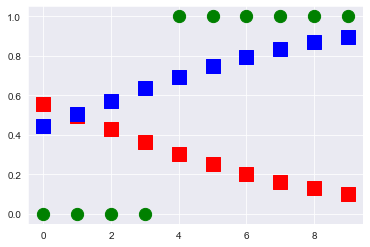

In [49]:
plt.scatter(x, y, color='green', s=150, marker="o") # график исходных данных
plt.scatter(x, z[:, 0], color='red', s=175, marker="s")  # график предсказанных данных для класса 0
plt.scatter(x, z[:, 1], color='blue', s=175, marker="s") # график предсказанных данных для класса 1

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LayerInput (Dense)          (None, 5)                 10        
                                                                 
 LayerTwo (Dense)            (None, 2)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


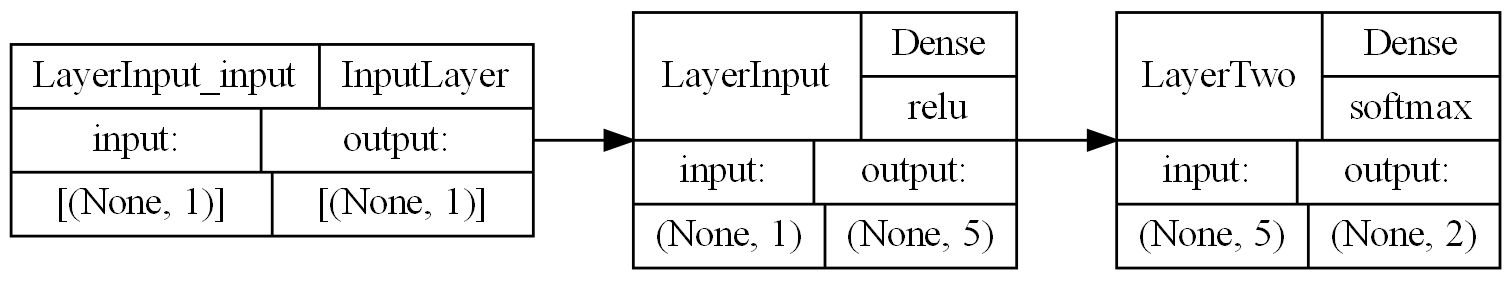

In [50]:
print(network.summary()) # Для плотных слоев: Param # вычисляется output_size * (input_size + 1) == number_parameters - 20*(1+1) + 2*(20+1) = 82
plot_model(network, show_shapes=True, show_layer_names=True, rankdir="LR", dpi=200, show_layer_activations=True) # network модель нейронной сети, show_shapes - отображать ли информацию о форме это ([None,1]), show_layer_names названия слоев которые были введены при создании модели нейронки, rankdir="LR" - рисунок горизонтально, 'TB' - вертикально, dpi разрешение show_layer_activations отображение активаций слоев (только для слоев, у которых есть activation свойство).

# может вывести вот такую ошибку - You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
# помогла вот эта установка в консоли анаконды -  conda install pydot

In [53]:
print(network.layers[0].get_weights()) # вывод весов первого [0] входного слоя сети
print('\n',network.layers[1].get_weights()) # сумма весов двух как раз и равна количеству параметров сети выше

[array([[-0.9963317 , -0.7210362 , -0.15454888,  0.57922363,  0.25995725]],
      dtype=float32), array([ 0.        ,  0.        ,  0.        , -0.06304935, -0.06341358],
      dtype=float32)]

 [array([[-0.88263726,  0.03582251],
       [-0.6458659 ,  0.43476093],
       [ 0.04827935, -0.11367977],
       [ 0.42952895,  0.75848293],
       [ 0.06623779,  0.36950654]], dtype=float32), array([ 0.10780364, -0.10780362], dtype=float32)]
